In [ ]:
!pip install torch torchvision detectron2 tensorflow opencv-python matplotlib numpy

ERROR: Could not find a version that satisfies the requirement detectron2 (from versions: none)
ERROR: No matching distribution found for detectron2


In [ ]:
!pip install torch torchvision torchaudio tensorflow opencv-python matplotlib numpy pyyaml==5.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.2/268.2 kB 12.3 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
!pip install 'git+https://github.com/facebookresearch/detectron2.git'

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-mtsqbgpd
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-mtsqbgpd
  Resolved https://github.com/facebookresearch/detectron2.git to commit 9604f5995cc628619f0e4fd913453b4d7d61db3f
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 66.2 MB/s eta 0:00:00
  Created wheel for detectron2: filename=detectron2-0.6-cp3

In [ ]:
!pip install 'git+https://github.com/facebookresearch/detectron2.git'

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-xnm706x9
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-xnm706x9
  Resolved https://github.com/facebookresearch/detectron2.git to commit 9604f5995cc628619f0e4fd913453b4d7d61db3f
  Preparing metadata (setup.py) ... done


In [ ]:
import torch
import detectron2
print("Detectron2 installed successfully!")

Detectron2 installed successfully!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#list of useful imports that  I will use
%matplotlib inline
import os
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import numpy as np
import seaborn as sns
import random
from keras.preprocessing import image
import tensorflow as tf
#from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, GlobalMaxPooling2D
from keras.optimizers import RMSprop
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [ ]:
file = '/content/drive/MyDrive/CELEB-DF (1).zip'

In [ ]:
import zipfile as zf
data_zip = zf.ZipFile(file)
data_zip.extractall()
!ls

'Celeb DF(v2)'	 drive	 sample_data


In [ ]:
from pathlib import Path
data1 = Path(r'/content/Celeb DF(v2)/train')

In [ ]:
Images = []
import os
for dirname, _, filenames in os.walk(data1):
    for filename in filenames:
        img = os.path.join(dirname, filename)
        Images.append(img)

In [ ]:
Images[:10]

['/content/Celeb DF(v2)/train/Fake/id3_id37_0002_frame390.jpg',
 '/content/Celeb DF(v2)/train/Fake/id1_id20_0000_frame360.jpg',
 '/content/Celeb DF(v2)/train/Fake/id3_id9_0005_frame60.jpg',
 '/content/Celeb DF(v2)/train/Fake/id1_id26_0003_frame210.jpg',
 '/content/Celeb DF(v2)/train/Fake/id1_id21_0005_frame60.jpg',
 '/content/Celeb DF(v2)/train/Fake/id1_id6_0007_frame150.jpg',
 '/content/Celeb DF(v2)/train/Fake/id0_id1_0009_frame360.jpg',
 '/content/Celeb DF(v2)/train/Fake/id2_id4_0006_frame180.jpg',
 '/content/Celeb DF(v2)/train/Fake/id0_id20_0000_frame240.jpg',
 '/content/Celeb DF(v2)/train/Fake/id2_id0_0003_frame300.jpg']

In [ ]:
len(Images)

14000

In [ ]:
Class_label = []
for i in Images:
  j = i.split("/")
  #print(j)
  Class_label.append(j[-2])
  #break

In [ ]:
Class_label[:10]

['Fake',
 'Fake',
 'Fake',
 'Fake',
 'Fake',
 'Fake',
 'Fake',
 'Fake',
 'Fake',
 'Fake']

In [ ]:
len(Class_label)

14000

In [ ]:
temp = list(zip(Images, Class_label))
random.shuffle(temp)
Images, Class_label = zip(*temp)

In [ ]:
data1 = pd.DataFrame(list(zip(Images, Class_label)), columns =['Image_path', 'Class_label'])

In [ ]:
data1.head(5)

,Image_path,Class_label
0,/content/Celeb DF(v2)/train/Real/id1_0007_fram...,Real
1,/content/Celeb DF(v2)/train/Real/id33_0004_fra...,Real
2,/content/Celeb DF(v2)/train/Fake/id1_id31_0000...,Fake
3,/content/Celeb DF(v2)/train/Real/id41_0008_fra...,Real
4,/content/Celeb DF(v2)/train/Fake/id0_id26_0002...,Fake


In [ ]:
data1.Class_label.value_counts()

,count
Class_label,
Real,7000
Fake,7000


In [ ]:
data1 = data1.sample(frac=1)

In [ ]:
data1.head(5)

,Image_path,Class_label
1024,/content/Celeb DF(v2)/train/Fake/id1_id28_0002...,Fake
11462,/content/Celeb DF(v2)/train/Real/id49_0003_fra...,Real
5813,/content/Celeb DF(v2)/train/Fake/id1_id17_0009...,Fake
9369,/content/Celeb DF(v2)/train/Real/id8_0009_fram...,Real
11718,/content/Celeb DF(v2)/train/Real/id36_0005_fra...,Real


In [ ]:
data1.Class_label.value_counts()

,count
Class_label,
Fake,7000
Real,7000


In [ ]:
from sklearn.utils import resample
# Separate majority and minority classes
df_c0 = data1[data1['Class_label']== 'Fake']
df_c1 = data1[data1['Class_label']== 'Real']


# Downsample majority class
df_c0_upsampled = resample(df_c0, replace=False,  n_samples = 2000,random_state=123)
df_c1_upsampled = resample(df_c1, replace=False,  n_samples = 2000,random_state=123)



# Combine minority class with downsampled majority class
df_upsampled = pd.concat([df_c0_upsampled,df_c1_upsampled])

#df_upsampled = pd.concat([df_c0_upsampled,df_c1_upsampled])


# Display new class counts
df_upsampled['Class_label'].value_counts()

,count
Class_label,
Fake,2000
Real,2000


<ipython-input-22-f3790f7b81cb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Class_label", data=df_upsampled, palette=sns.color_palette("cubehelix", 4))
<ipython-input-22-f3790f7b81cb>:4: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  ax = sns.countplot(x="Class_label", data=df_upsampled, palette=sns.color_palette("cubehelix", 4))


Text(0.5, 0, 'Class_label')

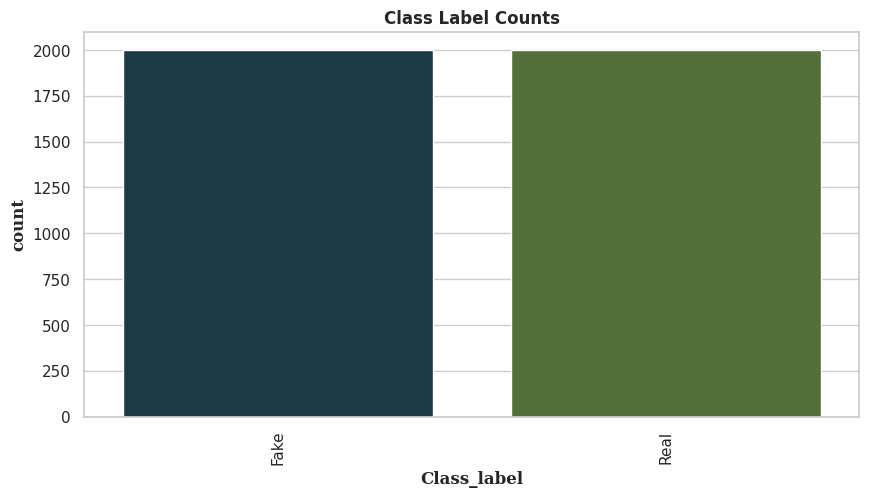

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))
ax = sns.countplot(x="Class_label", data=df_upsampled, palette=sns.color_palette("cubehelix", 4))
plt.xticks(rotation=90)
plt.title("Class Label Counts", {"fontname":"fantasy", "fontweight":"bold", "fontsize":"medium"})
plt.ylabel("count", {"fontname": "serif", "fontweight":"bold"})
plt.xlabel("Class_label", {"fontname": "serif", "fontweight":"bold"})

In [ ]:
data1 = df_upsampled.sample(frac=1)

In [ ]:
data1.head()

,Image_path,Class_label
6608,/content/Celeb DF(v2)/train/Fake/id2_id17_0006...,Fake
991,/content/Celeb DF(v2)/train/Real/id45_0007_fra...,Real
9067,/content/Celeb DF(v2)/train/Fake/id0_id26_0007...,Fake
12074,/content/Celeb DF(v2)/train/Fake/id2_id26_0006...,Fake
8383,/content/Celeb DF(v2)/train/Real/id34_0003_fra...,Real


In [ ]:
def resize_images(img):
  file = Image.open(img)
  img = file.convert('RGB')
  img_bgr= img.resize((224, 224))
  img_bgr = np.array(img_bgr)
  return img_bgr

In [ ]:
from PIL import Image

In [ ]:
#save resized images into images.
images = [resize_images(img) for img in data1['Image_path']]

In [ ]:
# print number of classes in our dataset
num_classes = len(np.unique(data1['Class_label']))

In [ ]:
num_classes

2

In [ ]:
# save the class into class_names
class_names = list(data1['Class_label'])

In [ ]:
# Print the shape of the image
images[0].shape

(224, 224, 3)

Text(0.5, 1.0, 'Fake')

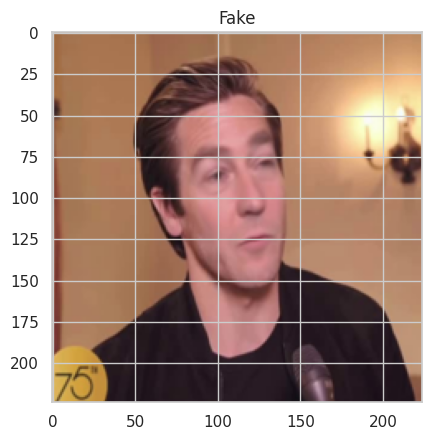

In [ ]:
#See the image with class label
plt.imshow(images[5])
plt.title(class_names[5])

Text(0.5, 1.0, 'Fake')

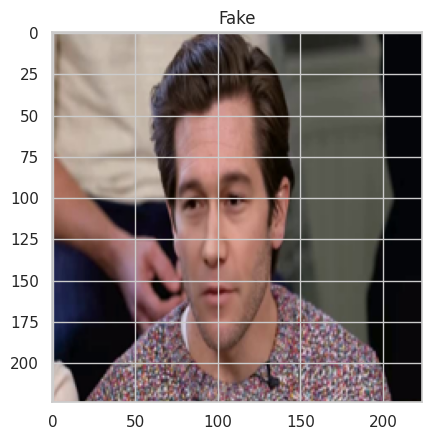

In [ ]:
#See the image with class label
plt.imshow(images[10])
plt.title(class_names[10])

In [ ]:
# Convert the images into array
images =  np.array(images)

In [ ]:
# Shape of the images
images.shape

(4000, 224, 224, 3)

In [ ]:
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y = enc.fit_transform(data1['Class_label'])

In [ ]:
y[:10]

array([[0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1]])

In [ ]:
def label_image(label):
    if label == 'Fake':
        return [0,1]
    elif label == 'Real':
        return [1,0]

In [ ]:
y = [label_image(label) for label in data1['Class_label']]

In [ ]:
y = np.array(y)

In [ ]:
y[:10]

array([[0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0]])

In [ ]:
data1['Class_label'][:10]

,Class_label
6608,Fake
991,Real
9067,Fake
12074,Fake
8383,Real
5881,Fake
13347,Real
1334,Real
5630,Real
12365,Real


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, y, test_size=0.3,stratify = y,random_state=42)

In [ ]:
X_train.shape

(2800, 224, 224, 3)

In [ ]:
X_test.shape

(1200, 224, 224, 3)

In [ ]:
from tensorflow.keras.applications import MobileNet

In [ ]:
mob = MobileNet(weights='imagenet',include_top=False,input_shape=(224,224,3))

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
model_mob=Sequential()
model_mob.add(mob)
model_mob.add(Flatten())
model_mob.add(Dense(128, activation='relu'))
model_mob.add(Dropout(0.2))
model_mob.add(Dense(2, activation='softmax'))

In [ ]:
#Compile the model
opt = Adam(learning_rate=0.001) # Changed lr to learning_rate

optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08, decay=0.0) # Changed lr to learning_rate
loss = tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.025)

model_mob.compile(optimizer = optimizer, loss = loss, metrics = ["accuracy"])

/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [ ]:
from keras.callbacks import ModelCheckpoint
filepath="/content/drive/My Drive/Deepfake-improvement_mobilenet-{epoch:02d}-{val_accuracy:.2f}.keras" # Changed .hdf5 to .keras
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:
History_mob = model_mob.fit(X_train, y_train, epochs = 5, validation_data = (X_test,y_test),batch_size = 100,callbacks=callbacks_list)

Epoch 1/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step - accuracy: 0.6977 - loss: 19.4644
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to /content/drive/My Drive/Deepfake-improvement_mobilenet-01-0.50.keras
28/28 ━━━━━━━━━━━━━━━━━━━━ 46s 558ms/step - accuracy: 0.7021 - loss: 19.0522 - val_accuracy: 0.5000 - val_loss: 0.9777
Epoch 2/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step - accuracy: 0.9313 - loss: 0.4385
Epoch 2: val_accuracy did not improve from 0.50000
28/28 ━━━━━━━━━━━━━━━━━━━━ 12s 269ms/step - accuracy: 0.9312 - loss: 0.4387 - val_accuracy: 0.5000 - val_loss: 2.5303
Epoch 3/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step - accuracy: 0.9008 - loss: 0.4364
Epoch 3: val_accuracy improved from 0.50000 to 0.60333, saving model to /content/drive/My Drive/Deepfake-improvement_mobilenet-03-0.60.keras
28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 316ms/step - accuracy: 0.9004 - loss: 0.4379 - val_accuracy: 0.6033 - val_loss: 1.0749
Epoch 4/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step - accura

In [ ]:
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.utils.visualizer import Visualizer

def setup_mask_rcnn():
    cfg = get_cfg()
    cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
    cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.4  # Lower threshold for better detection
    cfg.MODEL.DEVICE = "cpu"  # Use CPU if no GPU is available
    cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
    predictor = DefaultPredictor(cfg)
    return predictor

mask_rcnn = setup_mask_rcnn()

model_final_f10217.pkl: 178MB [00:00, 199MB/s]                           


/usr/local/lib/python3.11/dist-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3595.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


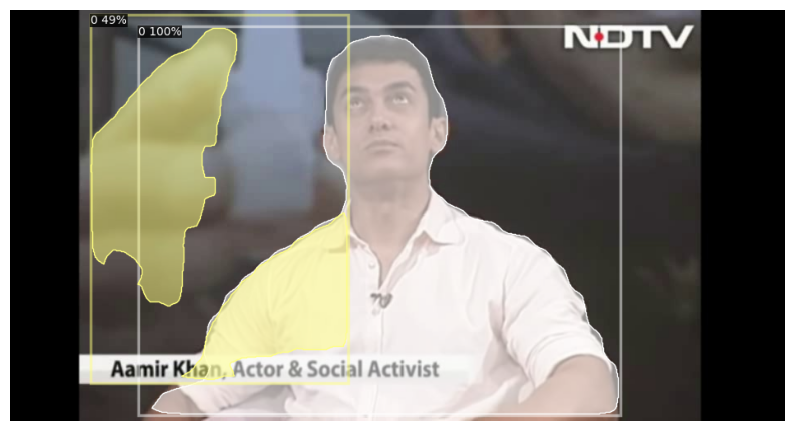

In [ ]:
def detect_fake_regions(image_path, predictor):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    outputs = predictor(image)

    v = Visualizer(image)
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))

    plt.figure(figsize=(10, 10))
    plt.imshow(v.get_image())
    plt.axis("off")
    plt.show()

# Define DATASET_PATH
DATASET_PATH = "/content/Celeb DF(v2)/" # or the actual path to your dataset

# Test Image (Change the path)
test_image = os.path.join(DATASET_PATH, "validate/Real/id0_0001_frame180.jpg")
detect_fake_regions(test_image, mask_rcnn)

38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step


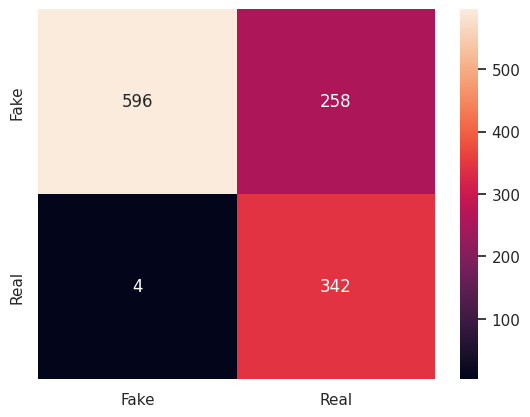

In [ ]:
# Code for drawing seaborn heatmaps
from sklearn.metrics import confusion_matrix
class_names = enc.classes_
# Use np.argmax to get the predicted classes from model.predict
df_heatmap = pd.DataFrame(confusion_matrix(np.argmax(model_mob.predict(X_test), axis=1),np.argmax(y_test,axis=1)), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [ ]:
# Evaluate the model
loss, accuracy = model_mob.evaluate(X_test, y_test)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.7933 - loss: 1.2710
Validation Accuracy: 78.17%


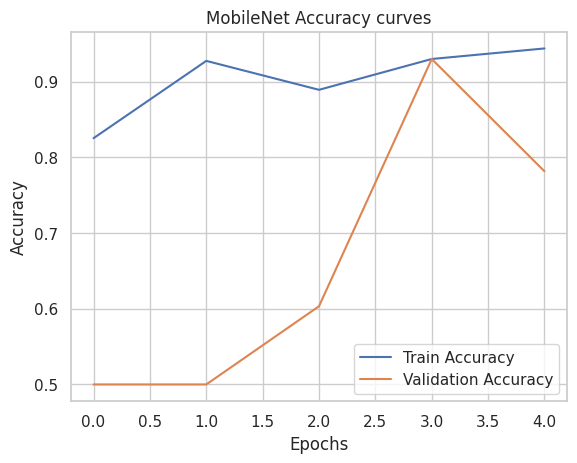

In [ ]:
# Plot training and validation accuracy
plt.plot(History_mob.history["accuracy"], label="Train Accuracy")
plt.plot(History_mob.history["val_accuracy"], label="Validation Accuracy")
plt.title("MobileNet Accuracy curves")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

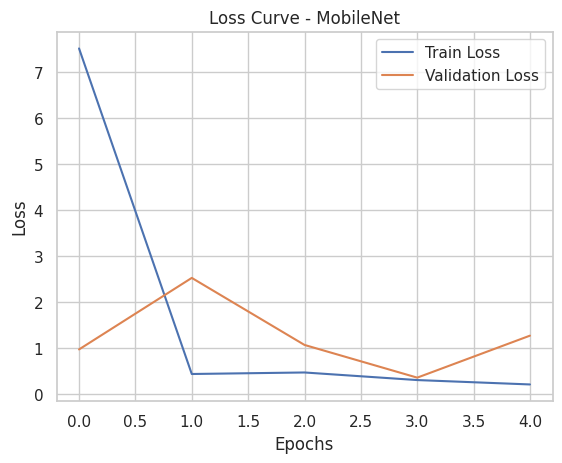

In [ ]:
# Loss Plot
plt.plot(History_mob.history['loss'], label='Train Loss')
plt.plot(History_mob.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve - MobileNet')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predicted class: Fake
Actual class: Fake


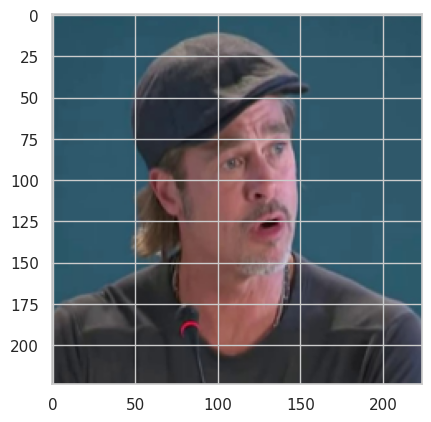

In [ ]:
i = 5
pred = np.argmax(model_mob.predict(np.array([X_test[i]]))[0])
act = np.argmax(y_test[i])
print("Predicted class: {}".format(enc.classes_[pred]))
print("Actual class: {}".format(enc.classes_[act]))
plt.imshow(X_test[i])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
Predicted class: Real
Actual class: Real


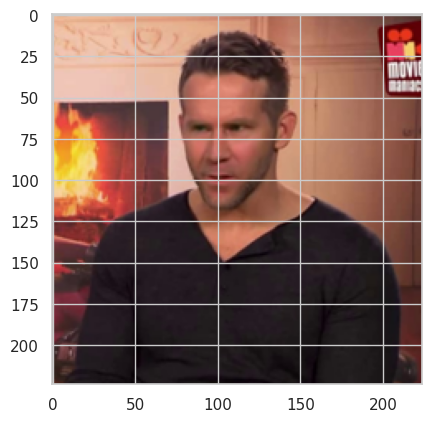

In [ ]:
i = 555
pred = np.argmax(model_mob.predict(np.array([X_test[i]]))[0])
act = np.argmax(y_test[i])
print("Predicted class: {}".format(enc.classes_[pred]))
print("Actual class: {}".format(enc.classes_[act]))
plt.imshow(X_test[i])

In [ ]:
file = '/content/drive/MyDrive/FACE_FORENSIC (1).zip'

In [ ]:
import zipfile as zf
data_zip = zf.ZipFile(file)
data_zip.extractall()
!ls

 1000_videos  'Celeb DF(v2)'   drive   sample_data


In [ ]:
from pathlib import Path
data1 = Path(r'/content/1000_videos/train')

In [ ]:
images = []
import os
for dirname, _, filenames in os.walk(data1):
    for filename in filenames:
        img = os.path.join(dirname, filename)
        images.append(img)

In [ ]:
images[:10]

['/content/1000_videos/train/real/id13_0000_8.png',
 '/content/1000_videos/train/real/id2_0002_7.png',
 '/content/1000_videos/train/real/188_4.png',
 '/content/1000_videos/train/real/id10_0005_1.png',
 '/content/1000_videos/train/real/id13_0012_9.png',
 '/content/1000_videos/train/real/201_20.png',
 '/content/1000_videos/train/real/id6_0009_9.png',
 '/content/1000_videos/train/real/id9_0009_7.png',
 '/content/1000_videos/train/real/id1_0000_11.png',
 '/content/1000_videos/train/real/id19_0004_0.png']

In [ ]:
len(images)

11633

In [ ]:
class_values = []
for i in images:
    j = i.split('/')
    class_values.append(j[-2])

In [ ]:
class_values[:10]

['real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real',
 'real']

In [ ]:
len(class_values)

11633

In [ ]:
import random # Import the random module at the beginning of the cell
temp = list(zip(images,class_values))
random.shuffle(temp)
images, class_values = zip(*temp)
data = pd.DataFrame(list(zip(images, class_values)), columns=['image_path', 'Class_label'])

In [ ]:
data

,image_path,Class_label
0,/content/1000_videos/train/real/id12_0000_2.png,real
1,/content/1000_videos/train/real/168_32.png,real
2,/content/1000_videos/train/fake/150_153_0.png,fake
3,/content/1000_videos/train/fake/180_105_3.png,fake
4,/content/1000_videos/train/real/id20_0007_10.png,real
...,...,...
11628,/content/1000_videos/train/real/id23_0006_7.png,real
11629,/content/1000_videos/train/real/id3_0007_2.png,real
11630,/content/1000_videos/train/fake/id1_id3_0005_9...,fake
11631,/content/1000_videos/train/fake/id0_id4_0004_6...,fake


In [ ]:
data.shape

(11633, 2)

In [ ]:
data.Class_label.value_counts()

,count
Class_label,
fake,6028
real,5605


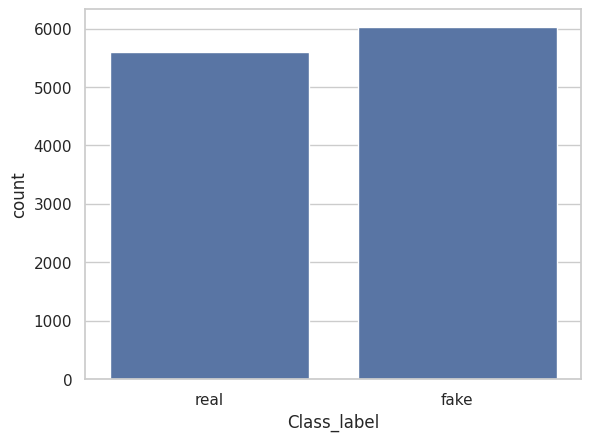

In [ ]:
sns.countplot(x = data.Class_label, data = data)
plt.show()

In [ ]:
from sklearn.utils import resample
df_c0 = data[data['Class_label'] =="fake"]
df_c1 = data[data['Class_label'] =="real"]

unsampled_df_c0 = resample(df_c0, replace=True, random_state=23, n_samples=2000)
unsampled_df_c1 = resample(df_c1, replace=True, random_state=23, n_samples=2000)

df_unsampled = pd.concat([unsampled_df_c0, unsampled_df_c1])
df_unsampled

,image_path,Class_label
1123,/content/1000_videos/train/fake/144_122_9.png,fake
9253,/content/1000_videos/train/fake/240_290_22.png,fake
2025,/content/1000_videos/train/fake/id1_id16_0002_...,fake
3782,/content/1000_videos/train/fake/id1_id0_0006_6...,fake
5740,/content/1000_videos/train/fake/id0_id20_0006_...,fake
...,...,...
10638,/content/1000_videos/train/real/159_7.png,real
6506,/content/1000_videos/train/real/162_8.png,real
6563,/content/1000_videos/train/real/234_6.png,real
3075,/content/1000_videos/train/real/id16_0000_2.png,real


In [ ]:
df_unsampled.Class_label.value_counts()

,count
Class_label,
fake,2000
real,2000


In [ ]:
data = df_unsampled.sample(frac=1)
data.shape

(4000, 2)

In [ ]:
df = data

In [ ]:
import os
from PIL import Image

In [ ]:
def resize_images(img):
  file = Image.open(img)
  img = file.convert('RGB')
  img_bgr= img.resize((224, 224))
  img_bgr = np.array(img_bgr)
  return img_bgr

In [ ]:
#save resized images into images.
images = [resize_images(img) for img in df['image_path']]

In [ ]:
images

[array([[[45, 36, 24],
         [45, 36, 24],
         [45, 36, 24],
         ...,
         [84, 70, 69],
         [80, 66, 65],
         [79, 65, 64]],
 
        [[46, 36, 24],
         [46, 36, 24],
         [46, 36, 24],
         ...,
         [84, 71, 69],
         [81, 67, 66],
         [80, 66, 65]],
 
        [[48, 36, 24],
         [48, 36, 24],
         [48, 36, 24],
         ...,
         [86, 73, 71],
         [83, 69, 69],
         [82, 68, 68]],
 
        ...,
 
        [[59, 48, 16],
         [59, 48, 16],
         [58, 47, 16],
         ...,
         [16,  8,  1],
         [19,  7,  1],
         [20,  7,  1]],
 
        [[58, 49, 16],
         [58, 48, 16],
         [57, 47, 17],
         ...,
         [16,  8,  2],
         [19,  8,  2],
         [20,  8,  2]],
 
        [[58, 49, 16],
         [57, 48, 16],
         [56, 47, 17],
         ...,
         [16,  8,  2],
         [19,  8,  2],
         [20,  8,  2]]], dtype=uint8),
 array([[[56, 47, 50],
         [56, 47, 5

In [ ]:
# print number of classes in our dataset
num_classes = len(np.unique(data['Class_label']))

In [ ]:
num_classes

2

In [ ]:
# save the class into class_names
class_names = list(data['Class_label'])

In [ ]:
# Print the shape of the image
images[0].shape

(224, 224, 3)

Text(0.5, 1.0, 'real')

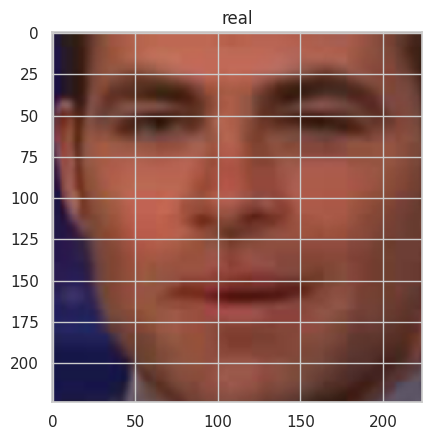

In [ ]:
#See the image with class label
plt.imshow(images[20])
plt.title(class_names[20])

In [ ]:
# Convert the images into array
images =  np.array(images)

In [ ]:
# Shape of the images
images.shape

(4000, 224, 224, 3)

In [ ]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
Y = enc.fit_transform(df['Class_label'])
from keras.utils  import to_categorical
y = to_categorical(Y)

In [ ]:
enc.classes_

array(['fake', 'real'], dtype=object)

In [ ]:
y[:10]

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [ ]:
y.shape

(4000, 2)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, y, test_size=0.3,stratify = y,random_state=42)

In [ ]:

# Importing necessary libraries
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import os

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Loading data
train_generator = train_datagen.flow(
    X_train, y_train, batch_size=32, shuffle=True
)
valid_generator = test_datagen.flow(
    X_test, y_test, batch_size=32, shuffle=False
)

# Compute class weights to handle imbalance
y_train_classes = np.argmax(y_train, axis=1)
class_weights = compute_class_weight(
    "balanced", classes=np.unique(y_train_classes), y=y_train_classes
)
class_weights = dict(enumerate(class_weights))
print("Class Weights: ", class_weights)

# Loading the MobileNet model
mobilenet_base = MobileNet(
    weights="imagenet", include_top=False, input_shape=(224, 224, 3)
)

# Adding custom layers
x = mobilenet_base.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)
predictions = Dense(2, activation="softmax")(x)  # 2 classes

model = Model(inputs=mobilenet_base.input, outputs=predictions)

# Freeze base model layers to train only the custom layers initially
for layer in mobilenet_base.layers:
    layer.trainable = False

# Compile the model
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

# Callbacks
early_stop = EarlyStopping(
    monitor="val_loss", patience=8, restore_best_weights=True
)
reduce_lr = ReduceLROnPlateau(
    monitor="val_loss", factor=0.2, patience=4, min_lr=1e-6
)

# Train the model
#history = model.fit(
 #   train_generator,
 #   validation_data=valid_generator,
 #   epochs=20,
  #  class_weight=class_weights,
   # callbacks=[early_stop, reduce_lr],
#)

# Fine-tuning: Unfreeze all layers and retrain
for layer in mobilenet_base.layers:
    layer.trainable = True

# Re-compile the model with a lower learning rate
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

history_fine = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=10,
    class_weight=class_weights,
    callbacks=[early_stop, reduce_lr],
)


Class Weights:  {0: 1.0, 1: 1.0}


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 85s 656ms/step - accuracy: 0.5443 - loss: 0.8109 - val_accuracy: 0.5758 - val_loss: 0.7973 - learning_rate: 1.0000e-05
Epoch 2/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 45s 375ms/step - accuracy: 0.6762 - loss: 0.6294 - val_accuracy: 0.6175 - val_loss: 0.7130 - learning_rate: 1.0000e-05
Epoch 3/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 34s 392ms/step - accuracy: 0.7335 - loss: 0.5429 - val_accuracy: 0.6725 - val_loss: 0.5957 - learning_rate: 1.0000e-05
Epoch 4/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 34s 382ms/step - accuracy: 0.7636 - loss: 0.4776 - val_accuracy: 0.7525 - val_loss: 0.4788 - learning_rate: 1.0000e-05
Epoch 5/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 35s 396ms/step - accuracy: 0.7885 - loss: 0.4610 - val_accuracy: 0.7933 - val_loss: 0.4174 - learning_rate: 1.0000e-05
Epoch 6/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 33s 375ms/step - accuracy: 0.8350 - loss: 0.3882 - val_accuracy: 0.8442 - val_loss: 0.3380 - learning_rate: 1.0000e-05
Epoch 7/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 42s 386ms/step - acc

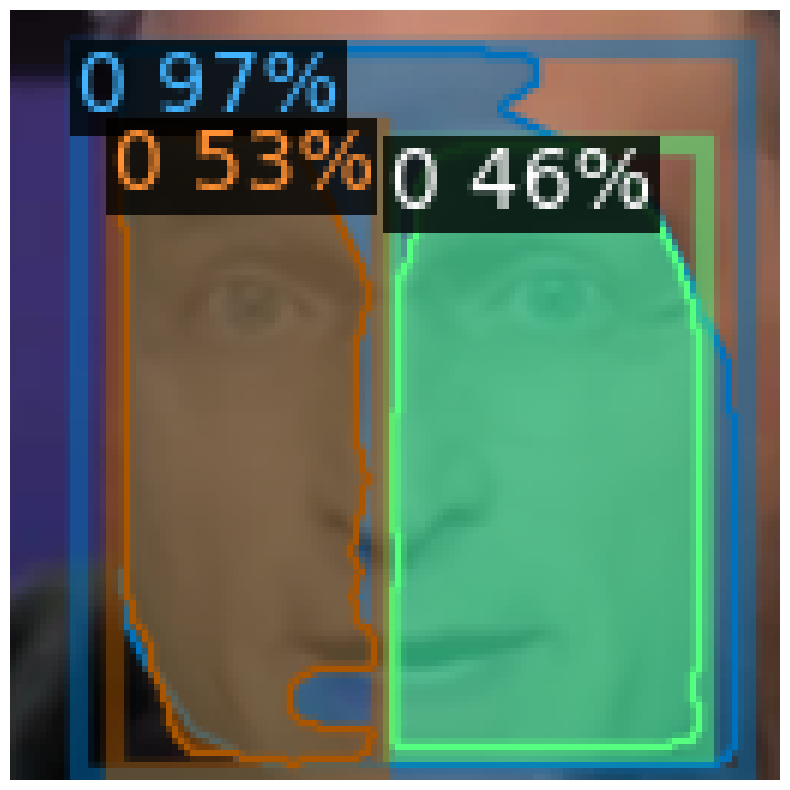

In [ ]:
# Import necessary libraries
import cv2
import os
import matplotlib.pyplot as plt
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.utils.visualizer import Visualizer

# Function to setup Mask R-CNN
def setup_mask_rcnn():
    cfg = get_cfg()
    cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
    cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.4  # Detection threshold
    cfg.MODEL.DEVICE = "cpu"  # Set to "cuda" if you have a GPU
    cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")

    predictor = DefaultPredictor(cfg)
    return predictor

# Initialize Mask R-CNN model
mask_rcnn = setup_mask_rcnn()

# Function to apply Mask R-CNN on an image
def detect_fake_regions(image_path, predictor):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    outputs = predictor(image)  # Run inference

    # Visualize the detected fake regions
    v = Visualizer(image)
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))

    plt.figure(figsize=(10, 10))
    plt.imshow(v.get_image())
    plt.axis("off")
    plt.show()

# Path to FaceForensics++ dataset
DATASET_PATH = "/content/1000_videos"  # Update this with the correct path

# Select a sample deepfake image from FaceForensics++ dataset
test_image = os.path.join(DATASET_PATH, "/content/1000_videos/validation/fake/006_002_0.png")

# Run Mask R-CNN detection on the sample image
detect_fake_regions(test_image, mask_rcnn)


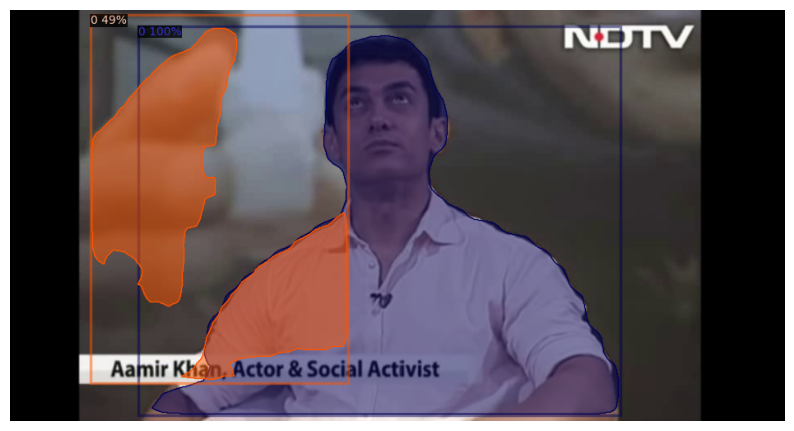

In [ ]:
def detect_fake_regions(image_path, predictor):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    outputs = predictor(image)

    v = Visualizer(image)
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))

    plt.figure(figsize=(10, 10))
    plt.imshow(v.get_image())
    plt.axis("off")
    plt.show()

# Define DATASET_PATH
DATASET_PATH = "/content/Celeb DF(v2)" # or the actual path to your dataset

# Test Image (Change the path)
test_image = os.path.join(DATASET_PATH, "validate/Real/id0_0001_frame180.jpg")
detect_fake_regions(test_image, mask_rcnn)

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(valid_generator)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8870 - loss: 0.2609
Validation Accuracy: 89.08%


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Predict on the validation data
y_pred = model.predict(valid_generator)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels

# Access true labels from y_test
y_true_classes = np.argmax(y_test, axis=1)  # True class labels


# Print classification report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=enc.classes_))  # Use enc.classes_ for class names

38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step
Classification Report:
              precision    recall  f1-score   support

        fake       0.87      0.91      0.89       600
        real       0.91      0.87      0.89       600

    accuracy                           0.89      1200
   macro avg       0.89      0.89      0.89      1200
weighted avg       0.89      0.89      0.89      1200



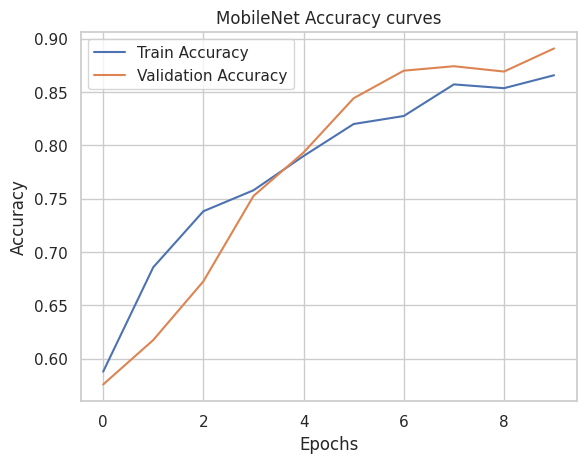

In [ ]:
# Plot training and validation accuracy
plt.plot(history_fine.history["accuracy"], label="Train Accuracy")
plt.plot(history_fine.history["val_accuracy"], label="Validation Accuracy")
plt.title("MobileNet Accuracy curves")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

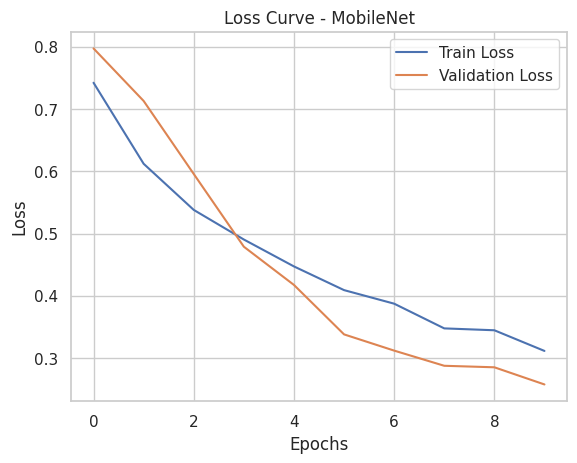

In [ ]:
# Loss Plot
plt.plot(history_fine.history['loss'], label='Train Loss')
plt.plot(history_fine.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve - MobileNet')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted class: fake
Actual class: fake


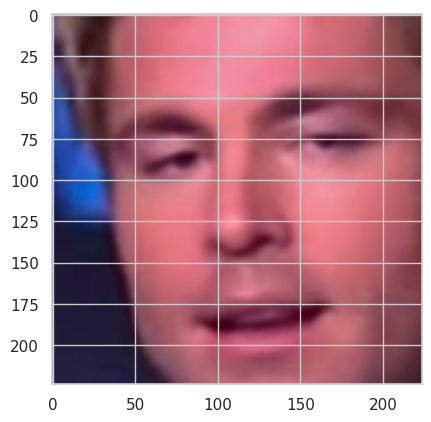

In [ ]:
i = 5
pred = np.argmax(model.predict(np.array([X_test[i]]))[0])
act = np.argmax(y_test[i])
print("Predicted class: {}".format(enc.classes_[pred]))
print("Actual class: {}".format(enc.classes_[act]))
plt.imshow(X_test[i])

In [ ]:
pip install mrcnn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.5/51.5 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mrcnn: filename=mrcnn-0.2-py3-none-any.whl size=54907 sha256=d56d368d2f08c9d5d3356c99f90886c605662d781655817647a30fe95f08e83b
  Stored in directory: /root/.cache/pip/wheels/78/48/79/befdb05914fe17ed22535bc6e0e8f93ce4730aa90aca603270
Successfully built mrcnn


In [ ]:
import json
import numpy as np
import cv2
import os
from mrcnn.utils import Dataset

class DeepFakeDataset(Dataset):
    def load_deepfake(self, dataset_dir, subset):
        """Load a subset of the deepfake dataset."""
        # Load images and annotations
        image_dir = os.path.join(dataset_dir, subset, "images")
        annotations_file = os.path.join(dataset_dir, subset, "annotations.json")

        # Read annotations file
        with open(annotations_file) as f:
            annotations = json.load(f)

        # Add classes (background + real/fake)
        self.add_class("deepfake", 1, "real")
        self.add_class("deepfake", 2, "fake")

        for image_info in annotations['images']:
            # Extract image information (file, width, height)
            image_path = os.path.join(image_dir, image_info["file_name"])
            width = image_info["width"]
            height = image_info["height"]

            annotations = image_info["annotations"]  # Get annotations for each image

            self.add_image(
                "deepfake", image_id=image_info["id"], path=image_path,
                width=width, height=height, annotations=annotations
            )

    def load_mask(self, image_id):
        """Load mask for each image."""
        image_info = self.image_info[image_id]
        annotations = image_info["annotations"]

        # Create a mask for each annotation
        masks = []
        class_ids = []

        for annotation in annotations:
            mask = self.create_mask(annotation)
            masks.append(mask)
            class_ids.append(annotation["category_id"])

        masks = np.stack(masks, axis=-1)
        return masks, np.array(class_ids)

    def create_mask(self, annotation):
        """Convert annotation polygons to masks."""
        mask = np.zeros((self.image_info[image_id]['height'], self.image_info[image_id]['width']))
        points = np.array(annotation["segmentation"][0]).reshape(-1, 2)
        cv2.fillPoly(mask, [points], 1)
        return mask


In [ ]:
from mrcnn.config import Config

In [ ]:
class DeepFakeConfig(Config):
    NAME = "deepfake"
    IMAGES_PER_GPU = 2  # Number of images per GPU in a batch
    NUM_CLASSES = 3  # Background + 2 classes (real and fake)
    DETECTION_MIN_CONFIDENCE = 0.9  # Minimum confidence to consider as a prediction
    BACKBONE = "resnet50"  # Use a ResNet backbone, you can also use "mobilenet" or others
    STEPS_PER_EPOCH = 100  # Number of steps per epoch
    VALIDATION_STEPS = 50  # Number of validation steps


In [ ]:
!pip install tensorflow==2.12.0

INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.0/586.0 MB 691.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 60.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 46.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 86.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 MB 17.8 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Unin

In [ ]:
from mrcnn.model import MaskRCNN
from mrcnn import utils

# Initialize the configuration and dataset
config = DeepFakeConfig()
model = MaskRCNN(mode="training", config=config, model_dir=os.getcwd())

# Load the COCO weights (if you are not using your own pre-trained model)
model.load_weights('mask_rcnn_coco.h5', by_name=True)

# Load the train and test datasets
dataset_train = DeepFakeDataset()
dataset_train.load_deepfake(X_train, y_train)
dataset_train.prepare()

dataset_test = DeepFakeDataset()
dataset_test.load_deepfake(X_test, y_test)
dataset_test.prepare()

# Train the model
model.train(dataset_train, dataset_test, epochs=30, layers='all')


AttributeError: module 'keras.engine' has no attribute 'Layer'

In [ ]:
# Install necessary libraries
# !pip install keras
# !pip install mrcnn

import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from mrcnn.config import Config
from mrcnn.model import MaskRCNN
from mrcnn import visualize
from tensorflow.keras.preprocessing import image

# Configuring the Mask R-CNN model
class DeepFakeConfig(Config):
    NAME = "deep_fake"
    IMAGES_PER_GPU = 1
    NUM_CLASSES = 2  # Change based on your classes, e.g. real and fake
    STEPS_PER_EPOCH = 100
    VALIDATION_STEPS = 5
    LEARNING_RATE = 0.001
    USE_MINI_MASK = False
    IMAGE_MIN_DIM = 512
    IMAGE_MAX_DIM = 512
    IMAGE_SHAPE = [512, 512, 3]
    BACKBONE = "resnet101"  # Can be resnet50 or any other backbone

# Create and configure model
config = DeepFakeConfig()
model = MaskRCNN(mode="training", config=config, model_dir=os.getcwd())

# Load pre-trained weights (either COCO or a specific set for deep fake detection)
# You can also load custom weights if you've trained the model before
model.load_weights('mask_rcnn_coco.h5', by_name=True)

# Training the model with custom dataset
# Here, we assume X_train and y_train are in the correct format
# Model training code goes here. You need to format your training data into the
# correct format that Mask R-CNN expects for object detection tasks.

# Use the fit() method to start training
# model.train(train_dataset, val_dataset, epochs=30, layers='all')

# Image detection (After training your model)
def detect_deepfake(image_path):
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    results = model.detect([img_rgb])

    r = results[0]  # Assuming only one image is passed

    # Visualizing the results
    visualize.display_instances(img_rgb, r['rois'], r['masks'], r['class_ids'],
                                class_names=['background', 'deepfake'], scores=r['scores'])

# Testing with a sample image
image_path = "/content/Celeb DF(v2)/train/Fake/id0_id16_0000_frame150.jpg"
detect_deepfake(image_path)


AttributeError: module 'keras.engine' has no attribute 'Layer'